In [45]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chisquare
from scipy.stats import ttest_ind

data = pd.read_csv('mpg.csv', sep=",")

In [13]:
data.head()

,s_no,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,1,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
data.columns = ["s_no", "mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]

In [5]:
data.corr()

,s_no,mpg,cylinders,displacement,weight,acceleration,model_year,origin
s_no,1.000000,0.585131,-0.363040,-0.386976,-0.318869,0.287634,0.996800,0.199702
mpg,0.585131,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.363040,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.386976,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.318869,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.287634,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model_year,0.996800,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.199702,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


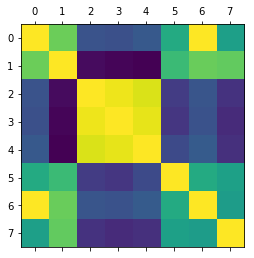

In [6]:
plt.matshow(data.corr())

In [23]:
data.loc[(data['cylinders']==6) & (data['displacement']==200), 'horsepower'] = '86'
data.loc[(data['cylinders']==4) & (data['displacement']==98), 'horsepower'] = '72'
data.loc[(data['cylinders']==4) & (data['displacement']==85), 'horsepower'] = '65'
data.loc[(data['cylinders']==4) & (data['displacement']==140), 'horsepower'] = '85'
data.loc[(data['cylinders']==4) & (data['displacement']==151), 'horsepower'] = '89'
data.loc[(data['cylinders']==4) & (data['displacement']==100), 'horsepower'] = '83'

In [24]:
data[['horsepower']] = data[['horsepower']].apply(pd.to_numeric)
data.dtypes

s_no              int64
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [28]:
sns.set(style="ticks", color_codes=True)

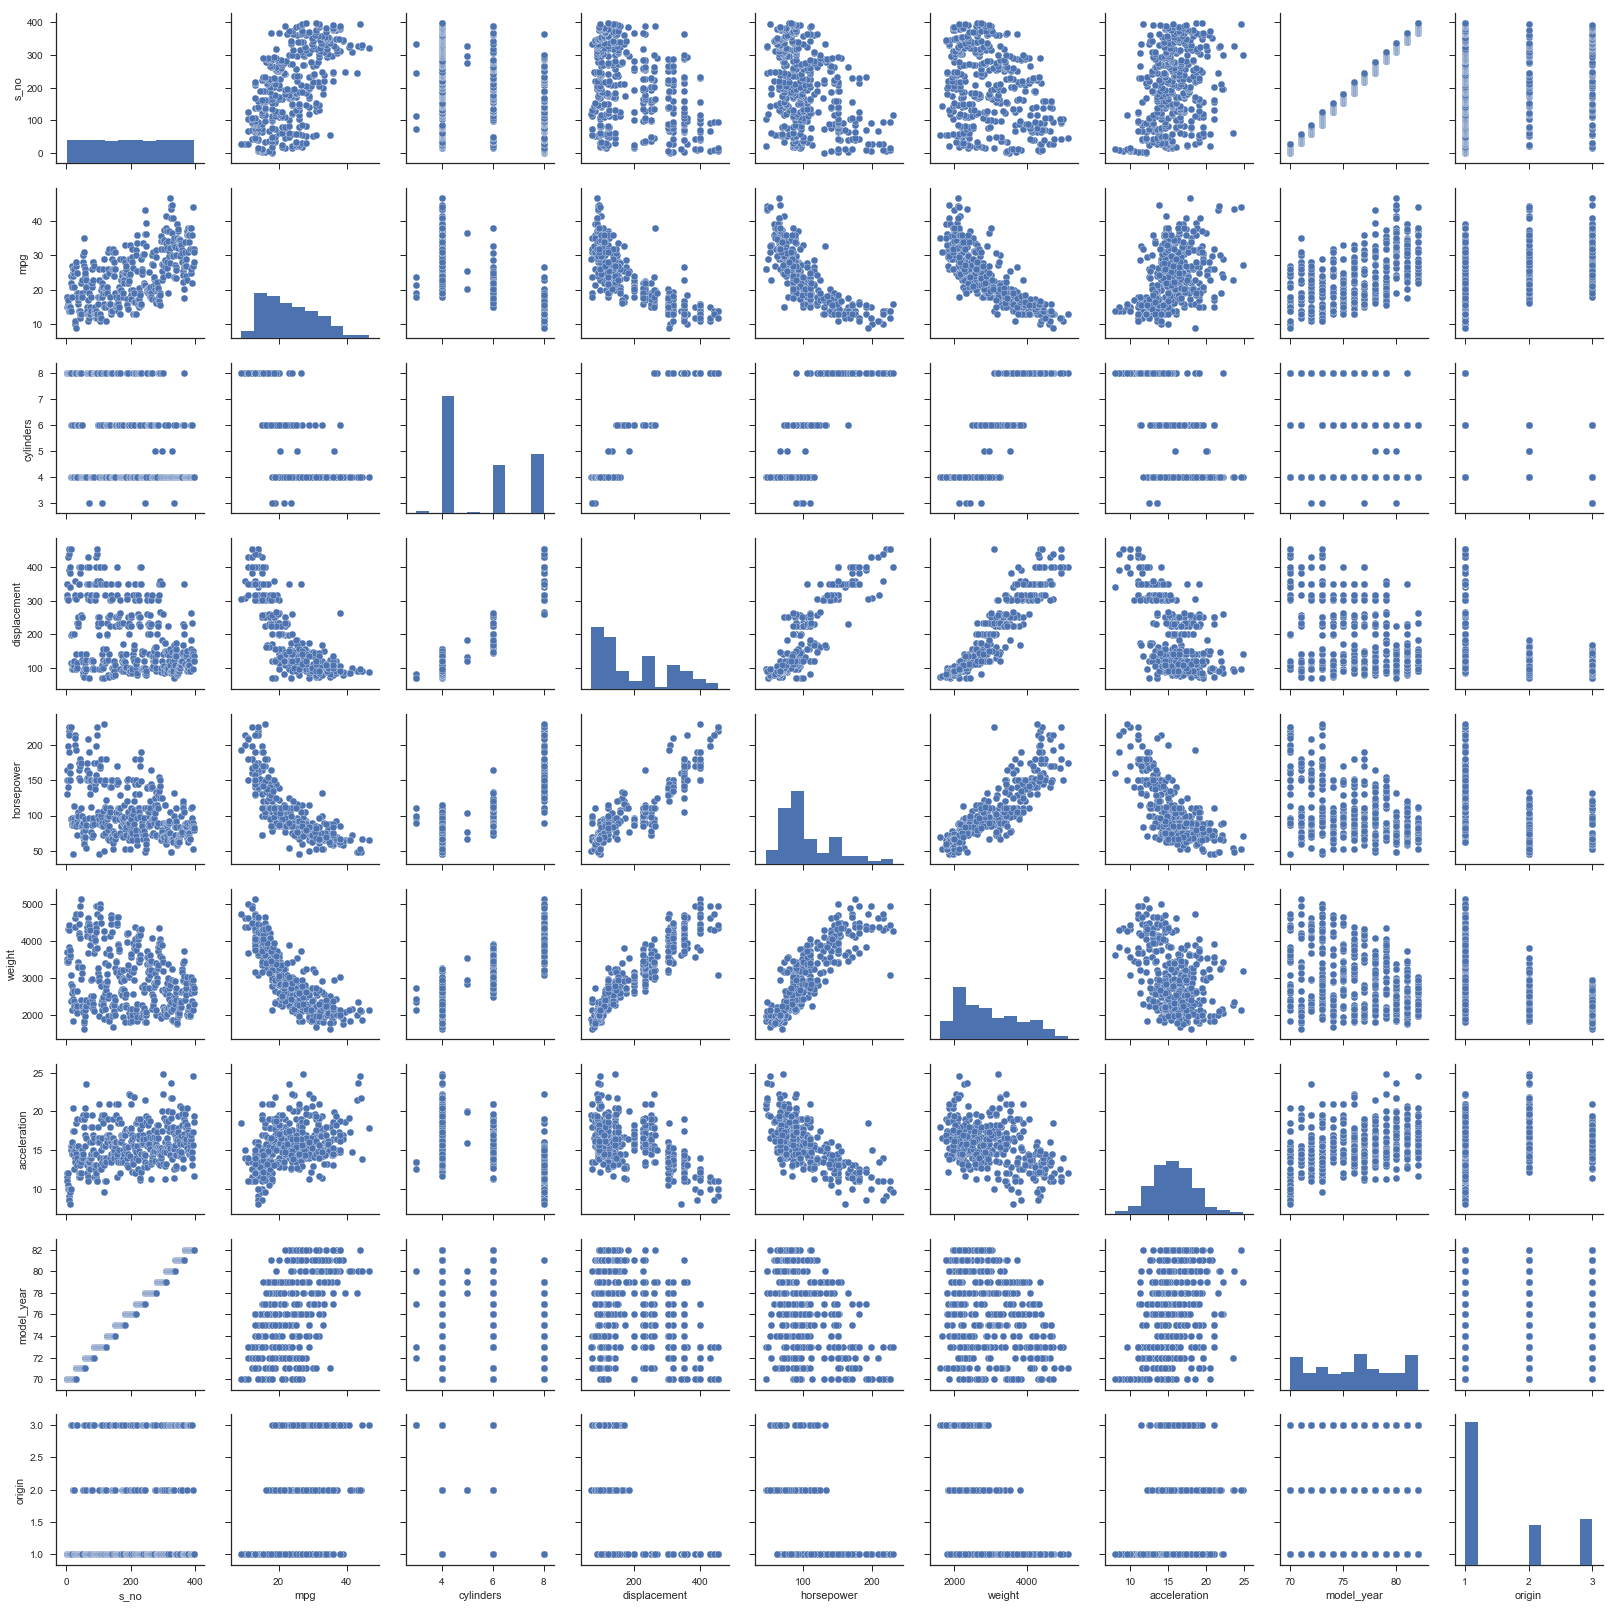

In [29]:
g = sns.pairplot(data)

In [35]:
mpg_model = ols("mpg ~ weight+origin+model_year", data=data).fit()
mpg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     587.7
Date:                Wed, 18 Jul 2018   Prob (F-statistic):          4.96e-145
Time:                        13:39:32   Log-Likelihood:                -1044.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     394   BIC:                             2112.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.8822      3.958     -4.518      0.000     -25.664     -10.101
weight        -0.0060      0.000    -23.873      0.000      -0.007      -0.006
origin         1.1663      0.258      4.524      0.000       0.659       1.673
model_year     0.7559      0.048     15.808      0.000       0.662       0.850
==============================================================================
Omnibus:                       38.442   Durbin-Watson:                   1.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.514
Skew:                           0.570   Prob(JB):                     1.79e-16
Kurtosis:                       4.753   Cond. No.                     7.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000105E3E48>]],
      dtype=object)

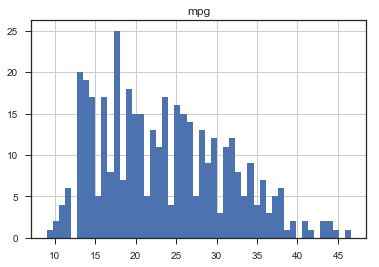

In [38]:
data.hist(column='mpg', bins=50)

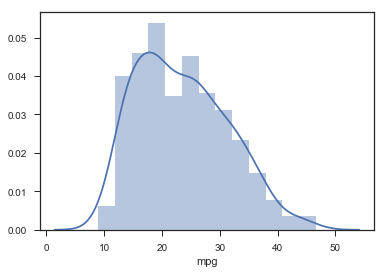

In [40]:
sns.distplot(data.mpg)

In [43]:
chisquare(data.mpg, ddof=[0,1,2])

Power_divergenceResult(statistic=1031.3849040475275, pvalue=array([6.24102572e-58, 3.85870708e-58, 2.38275262e-58]))

In [44]:
chisquare(data.mpg)

Power_divergenceResult(statistic=1031.3849040475275, pvalue=6.241025723890054e-58)

In [46]:
mpg1 = data[data['cylinders']==4]
mpg2 = data[data['cylinders']!=4]

ttest_ind(mpg1['mpg'], mpg2['mpg'])

Ttest_indResult(statistic=23.144542332753918, pvalue=1.4189310266669597e-75)

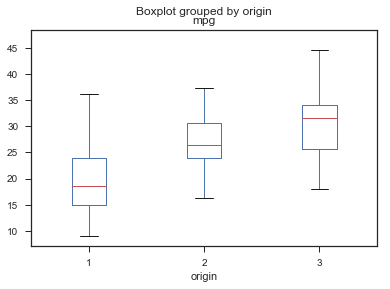

In [58]:
data.boxplot(by='origin', 
                       column=['mpg'], 
                       grid=False)

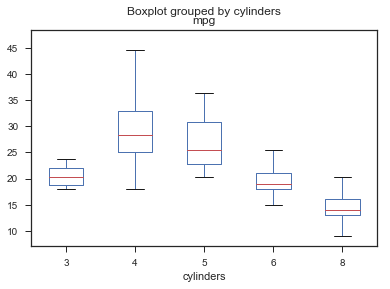

In [57]:
data.boxplot(by='cylinders', 
                       column=['mpg'], 
                       grid=False)

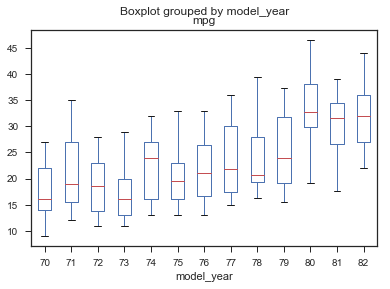

In [59]:
data.boxplot(by='model_year', 
                       column=['mpg'], 
                       grid=False)